In [1]:
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

2026-02-02 08:25:32.797206: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-02 08:25:32.837558: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-02 08:25:33.801457: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## CNN in MNIST Data

In [22]:
from tensorflow.keras.datasets import mnist, cifar10

In [23]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

/home/shailesh/Desktop/education/.venv/lib/python3.12/site-packages/keras/src/datasets/cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


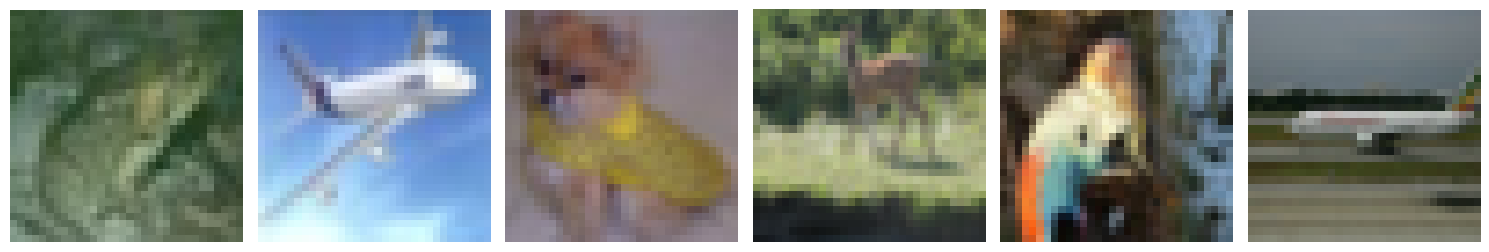

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Select 6 images (you can choose specific indices if needed)
indices = np.random.choice(len(X_train), 6, replace=False)
selected_images = [X_train[i] for i in indices]

# Create subplots
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Plot each image
for ax, img in zip(axes, selected_images):
    ax.imshow(img, cmap='gray')  # Display image in grayscale
    ax.axis('off')  # Turn off axes for a cleaner look

# Display the plot
plt.tight_layout()
plt.show()

In [5]:
# Data Preprocessing
X_train = X_train.reshape(*X_train.shape, 1)
X_test = X_test.reshape(*X_test.shape, 1)

# min-max scaling (0-1)
X_train = X_train / 255
X_test = X_test / 255

## Model Defination

In [6]:
input_shape = X_train.shape[1:]

In [7]:
model = Sequential()

# Input Layer
model.add(Input(shape = input_shape))

# Convolution layer 1
model.add(Conv2D(filters = 6, kernel_size=(5,5), strides=(1,1), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# Convolution layer 2
model.add(Conv2D(filters = 16, kernel_size=(5,5), strides=(1,1), padding="valid", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())

# Fully Connected layer
# Classification Head
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.25)) # Dropout
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation="softmax"))


model.compile(
    optimizer="Adam",
    loss = "sparse_categorical_crossentropy",
    metrics=['accuracy']
)

I0000 00:00:1770000035.287929   81838 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 4095 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        25,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,832 (132.16 KB)

 Trainable params: 33,832 (132.16 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    X_train, y_train, epochs=25, batch_size=64, verbose=1, validation_split=0.2
)

Epoch 1/25


2026-02-02 08:25:36.776069: I external/local_xla/xla/service/service.cc:163] XLA service 0x72ac7c0043d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-02-02 08:25:36.776083: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2026-02-02 08:25:36.797528: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2026-02-02 08:25:36.941245: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91801
2026-02-02 08:25:37.020734: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-02-02 08:25:37.

127/750 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5121 - loss: 1.5235

I0000 00:00:1770000041.189779   81942 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


739/750 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7897 - loss: 0.6760

2026-02-02 08:25:42.316253: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-02-02 08:25:43.481012: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2026-02-02 08:25:43.757879: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_88', 4 bytes spill stores, 4 bytes spill loads

2026-02-02 08:25:43.948717: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Reg

750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9009 - loss: 0.3256 - val_accuracy: 0.9641 - val_loss: 0.1145
Epoch 2/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9683 - loss: 0.1027 - val_accuracy: 0.9796 - val_loss: 0.0655
Epoch 3/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9763 - loss: 0.0786 - val_accuracy: 0.9812 - val_loss: 0.0628
Epoch 4/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9807 - loss: 0.0635 - val_accuracy: 0.9859 - val_loss: 0.0499
Epoch 5/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9828 - loss: 0.0561 - val_accuracy: 0.9842 - val_loss: 0.0563
Epoch 6/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9855 - loss: 0.0466 - val_accuracy: 0.9847 - val_loss: 0.0521
Epoch 7/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9869 - loss: 0.0420 - val_accuracy: 0.9872 - val_loss: 0.0468
Epoch 8/25
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0390 - val_accuracy: 0.9884 - val_

In [10]:
import pandas as pd
df = pd.DataFrame(history.history)

<Axes: >

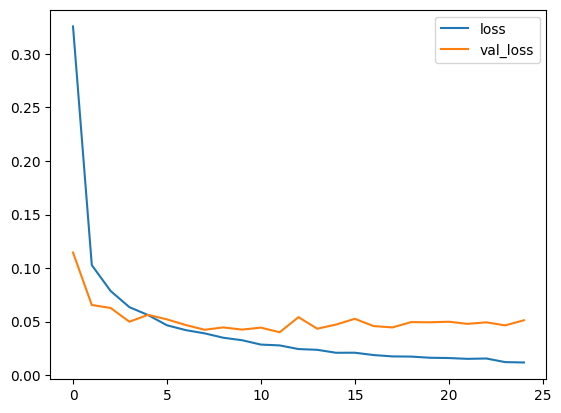

In [11]:
df[['loss','val_loss']].plot.line()

In [12]:
from sklearn.metrics import confusion_matrix

pred = np.argmax(model.predict(X_test), axis = 1)

confusion_matrix(y_test, pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[ 973,    0,    1,    0,    0,    0,    4,    1,    0,    1],
       [   0, 1131,    0,    0,    1,    1,    1,    1,    0,    0],
       [   0,    1, 1027,    0,    1,    0,    1,    2,    0,    0],
       [   0,    0,    1, 1002,    0,    4,    0,    0,    1,    2],
       [   0,    0,    0,    0,  971,    0,    2,    1,    1,    7],
       [   1,    0,    1,    4,    0,  879,    3,    0,    2,    2],
       [   2,    2,    0,    0,    1,    1,  951,    0,    1,    0],
       [   0,    2,    3,    1,    0,    0,    0, 1016,    1,    5],
       [   1,    0,    3,    2,    0,    1,    0,    0,  961,    6],
       [   0,    0,    0,    0,    3,    3,    0,    0,    2, 1001]])